### 작가 작품 가격 중 하위 20%의 최대값 계산
- 작품들의 80%는 이 값과 같거나 크다
- 미니멈 예상 투자 액수 추정 - 작가 자체를 알아볼 시간을 단축

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

MAKER_ID=10800
df = pd.read_csv(f"../data/phillips_auction_results_transformed_{MAKER_ID}.csv")
df.head()

,artist,title,start_date,end_date,low_estimate,high_estimate,price,auction_site,year,artwork_type,edition,height_cm,width_cm,currency,low_estimate_USD,high_estimate_USD,price_USD
0,Pablo Picasso,Buste d'homme,2024-11-19T22:00:00,2024-11-19T22:00:00,3000000.0,5000000.0,3085000.0,Phillips,1964.0,oil,NaN,73.0,53.3,$,3000000.00,5000000.00,3085000.00
1,Pablo Picasso,Homme à la coupe assis,2024-11-20T15:00:00,2024-11-20T15:00:00,350000.0,550000.0,381000.0,Phillips,1966.0,crayon,NaN,60.3,49.5,$,350000.00,550000.00,381000.00
2,Pablo Picasso,"Pismo (lettre), from Escrito (Bl. 462, Ba. 785...",2025-01-23T17:00:00,2025-01-24T18:00:00,2000.0,3000.0,6096.0,Phillips,1947.0,Etching,64.0,33.0,20.5,£,2470.78,3706.17,7530.95
3,Pablo Picasso,Homme à la coupe assis,2024-11-20T15:00:00,2024-11-20T15:00:00,350000.0,550000.0,381000.0,Phillips,1966.0,crayon,NaN,60.3,49.5,$,350000.00,550000.00,381000.00
4,Pablo Picasso,Buste d'homme,2024-11-19T22:00:00,2024-11-19T22:00:00,3000000.0,5000000.0,3085000.0,Phillips,1964.0,oil,NaN,73.0,53.3,$,3000000.00,5000000.00,3085000.00


In [8]:
# 가격이 빈 데이터 제거
# price_USD가 NaN인 데이터 제거
df.dropna(subset=['price_USD'], inplace=True)

# 결과 확인
df.head()

,artist,title,start_date,end_date,low_estimate,high_estimate,price,auction_site,year,artwork_type,edition,height_cm,width_cm,currency,low_estimate_USD,high_estimate_USD,price_USD
0,Pablo Picasso,Buste d'homme,2024-11-19T22:00:00,2024-11-19T22:00:00,3000000.0,5000000.0,3085000.0,Phillips,1964.0,oil,NaN,73.0,53.3,$,3000000.00,5000000.00,3085000.00
1,Pablo Picasso,Homme à la coupe assis,2024-11-20T15:00:00,2024-11-20T15:00:00,350000.0,550000.0,381000.0,Phillips,1966.0,crayon,NaN,60.3,49.5,$,350000.00,550000.00,381000.00
2,Pablo Picasso,"Pismo (lettre), from Escrito (Bl. 462, Ba. 785...",2025-01-23T17:00:00,2025-01-24T18:00:00,2000.0,3000.0,6096.0,Phillips,1947.0,Etching,64.0,33.0,20.5,£,2470.78,3706.17,7530.95
3,Pablo Picasso,Homme à la coupe assis,2024-11-20T15:00:00,2024-11-20T15:00:00,350000.0,550000.0,381000.0,Phillips,1966.0,crayon,NaN,60.3,49.5,$,350000.00,550000.00,381000.00
4,Pablo Picasso,Buste d'homme,2024-11-19T22:00:00,2024-11-19T22:00:00,3000000.0,5000000.0,3085000.0,Phillips,1964.0,oil,NaN,73.0,53.3,$,3000000.00,5000000.00,3085000.00


In [9]:
# 가격 하위 20% 데이터의 최댓값 (즉 80%의 데이터가 이 값보다 큼)
percentile_20 = df['price_USD'].quantile(0.2)

# 결과 출력
print(f"가격 하위 20%의 최대 값: {percentile_20}")

가격 하위 20%의 최대 값: 5334.0


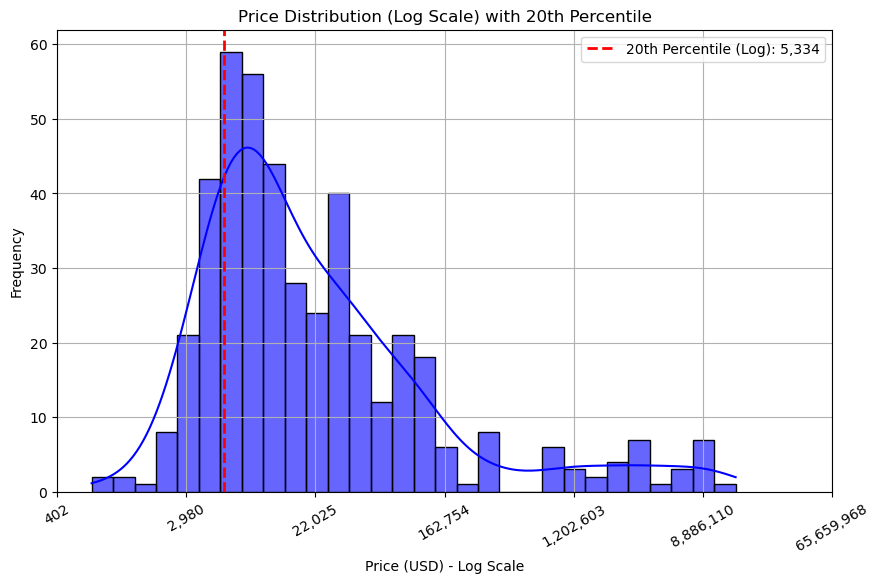

In [10]:
# 가격 데이터의 로그 변환 (왜곡된 분포 조정)
log_prices = np.log1p(df['price_USD'])  # log(1 + price) 적용

# 히스토그램 그리기
plt.figure(figsize=(10, 6))
sns.histplot(log_prices, bins=30, kde=True, color='blue', alpha=0.6)

# 20분위수 수직선 추가 (로그 변환된 값으로 변환하여 표시)
log_percentile_20 = np.log1p(percentile_20)
plt.axvline(log_percentile_20, color='red', linestyle='dashed', linewidth=2, label=f'20th Percentile (Log): {percentile_20:,.0f}')

# X축을 원래 가격 범위로 변환하여 보기 좋게 표시
xticks = plt.xticks()[0]  # 현재 자동 설정된 x축 눈금값 가져오기
xticks_labels = [f"{np.expm1(x):,.0f}" for x in xticks]  # 로그값을 원래 가격으로 변환
plt.xticks(xticks, xticks_labels, rotation=30)  # 변환된 값으로 x축 설정

# 그래프 설정
plt.xlabel("Price (USD) - Log Scale")
plt.ylabel("Frequency")
plt.title("Price Distribution (Log Scale) with 20th Percentile")
plt.legend()
plt.grid(True)

# 그래프 출력
plt.show()